---

# `Instruções para o teste`

## ⚠️ Importante

Antes de iniciar, não esqueça de renomear esse documento substituindo o texto **SEU_NOME** no título com o nome de quem for resolver.

Deixe as respostas bem sinalizadas e comentadas e mencionando a qual questão se refere.

Fique à vontade para utilizar quantas células forem necessárias.

<br><br>

## 📖 Recursos Permitidos
✅ Documentação, sites, fóruns  
❌ Inteligências Artificiais (ChatGPT, Claude, etc.)

<br><br>

## 📤 Instruções para Entrega

**Ao finalizar o teste** volte a este passo e execute a célula abaixo.

**Envie o arquivo gerado e o arquivo do seu notebook para o e-mail:** `mateus.camacho@tdwbi.com.br`

- Arquivo gerado: `historico_exec.txt` <br>
- Seu notebook: `teste_spark_SEU_NOME.ipynb`


In [108]:
### EXECUTE ESTA CÉLULA APENAS AO FINAL DO TESTE ###

%history -t /content/historico_exec.txt
from google.colab import files
files.download('/content/historico_exec.txt')

FileNotFoundError: Cannot find file: /content/historico_exec.txt

---

# `Questões e Contexto`

## 📁 Contexto

No diretório raiz desse documento, existem os três arquivos que serão necessários para a conclusão dessa atividade. Em caso de dúvidas, a pasta de se encontra no desktop dessa máquina na pasta 'pyspark_test'.

Os dados são fictícios e compreendem uma simulação de um cenário de uma loja de departamentos, para isso temos os arquivos com as seguintes informações:
- **users.csv** → Dados dos clientes/usuários da loja
- **sales.csv** → Dados das vendas
- **products.json** → Dados de cadastro dos produtos

<br><br>

## 📝 Questões

A atividade consiste nas questões a seguir:

**1.** Declare um novo dataframe que mostre o nome do produto e o valor final da compra.

**2.** Declare um novo dataframe com o valor total gasto por cliente.

**3.** Declare um novo dataframe com os cinco melhores clientes contendo o nome, e-mail e o valor gasto em todo o período.

**4.** Declare um novo dataframe com os cinco produtos mais vendidos nos últimos seis meses (considerando período de dados disponível nos arquivos) contendo o nome do produto e a quantidade de produtos vendidos nesse período.

**5.** Calcular a média de faturamento por cliente e o desvio padrão.

**6.** Classificar os clientes em três categorias: silver, gold, platinum
- **platinum:** clientes que gastaram mais que a média de faturamento por cliente;
- **gold:** clientes que gastaram do menor desvio padrão até a média de faturamento por cliente;
- **silver:** clientes que gastaram no máximo a média menos o desvio padrão do faturamento por cliente;

**7.** Salvar um arquivo parquet com os três produtos mais consumidos de cada categoria do cliente.

---

# `Configuração do ambiente`

**Execute as células abaixo antes de iniciar o teste.**

Os arquivos serão criados automaticamente e estarão disponíveis no ícone de pasta do menu lateral (conforme imagem abaixo) ou na pasta **content**.

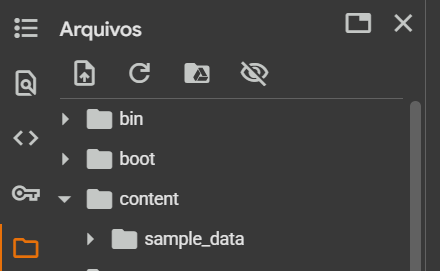


In [ ]:
### IMPORTANDO ARQUIVOS QUE SERÃO USADOS NO TESTE ###

!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/products.json -O products.json
!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/sales.csv -O sales.csv
!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/users.csv -O users.csv

path_products = "/content/products.json"
path_sales = "/content/sales.csv"
path_users = "/content/users.csv"

In [109]:
### IMPORTANDO BIBLIOTECAS NECESSÁRIAS ###

from pyspark.sql import SparkSession
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [110]:
### INSTANCIANDO SPARK ###

spark = SparkSession.builder.appName('test-spark').getOrCreate()

---

# Seu teste começa aqui 🍀 Boa sorte!

In [111]:
#carregando os dfs
df_sales = spark.read.csv(path_sales, header=True)
df_users = spark.read.csv(path_users, header=True)
df_products = spark.read.json(path_products)

In [112]:
#TASK 1
df_join = df_sales.join(df_products, "product_id")
df_clear = df_join.withColumn("price", regexp_replace(col("price"), "\\$", "")) \
            .withColumn("price", col("price").cast(FloatType())) \
            .withColumn("qtde", col("qtde").cast(IntegerType())) \
            .withColumn('Total Vendas Produto', col('price') * col('qtde')) \
            .withColumnRenamed("product", "Nome do Produto")


df_resultado = df_clear.select("Nome do Produto","Total Vendas Produto").show()

+------------------+--------------------+
|   Nome do Produto|Total Vendas Produto|
+------------------+--------------------+
|     Blusa Cropped|               214.5|
|Camiseta Estampada|              218.38|
|     Óculos de Sol|              244.54|
|        Bolsa Tote|              105.96|
|     Camisa Social|              161.52|
|Conjunto de Pijama|               85.49|
|     Camiseta Polo|              224.04|
|        Macaquinho|              191.32|
|     Chapéu Fedora|              301.77|
|    Blusa de Renda|                98.9|
|     Camisa Xadrez|               102.7|
|         Sapatênis|              251.76|
|        Sapatilhas|              123.33|
|       Camisa Polo|               259.5|
| Casaco de Inverno|              235.76|
|Suéter de Cashmere|               82.64|
|Calça Cintura Alta|               218.6|
|     Camiseta Polo|              336.06|
|     Jaqueta Jeans|              116.02|
|  Vestido Camisola|                95.6|
+------------------+--------------

In [113]:
#TASK 2
df_total_por_cliente = (df_clear
    .groupBy("client_id")
    .agg(round(sum("Total Vendas Produto"), 2).alias("Total Por Cliente"))
)

df_join = df_users.join(df_total_por_cliente, "client_id")

df_vendas_por_cliente = df_join.select("Name", "Total Por Cliente") \
            .withColumnRenamed("Name", "Cliente").show()

+------------------+-----------------+
|           Cliente|Total Por Cliente|
+------------------+-----------------+
|      Derrek Gaine|           787.08|
|    Gunner Steutly|          1275.22|
|  Katinka Mosedill|           513.84|
|       Curr Whisby|          1205.36|
|    Colin Simonsen|           827.77|
|     Ferrel Orriss|           785.26|
|   Micky Livermore|           883.78|
|     Yorke Grimsey|           828.79|
|    Kerrin Gratrex|           495.07|
|  Jacqui Cullabine|           991.58|
|      Lorita Seine|           201.62|
|    Ganny Richards|          1278.64|
|     Marnia Kleuer|           390.48|
|      Cammy Solway|           974.77|
|Rafaello Laurenson|          1062.87|
|       Franni Nore|           957.49|
|     Keen Juggings|          1795.86|
|    Melodee Lenard|          1176.89|
|     Barnaby Clemo|           505.69|
|   Isador Coughlin|           224.22|
+------------------+-----------------+
only showing top 20 rows



In [114]:
#TASK 3
df_top_clientes = df_join.select("name", "email", "Total por Cliente") \
                  .sort(desc("Total Por Cliente")) \
                  .withColumnRenamed("name", "Nome do Cliente") \

df_top_clientes.show(5)

+-----------------+--------------------+-----------------+
|  Nome do Cliente|               email|Total por Cliente|
+-----------------+--------------------+-----------------+
|Randa Friedenbach|rfriedenbach3m@pa...|          2240.51|
|  Giuditta Blease|gblease6s@friendf...|          1902.85|
|     Cher Higford| chigfordn@issuu.com|          1843.35|
|    Keen Juggings|kjuggings5j@phoca.cz|          1795.86|
|    Alfie Pattlel|apattlelu@discuz.net|           1755.6|
+-----------------+--------------------+-----------------+
only showing top 5 rows



In [115]:
#TASK 4
#Faço o tratamento da data e salvo o max da data como maxd
df_sales_date = df_sales.withColumn(
    "data_tratada", to_date(col("date"), "dd/MM/yyyy")
)

max_df = df_sales_date.select(max("data_tratada").alias("maxd"))

# pego os ultimos 6 meses baseados no maxd e dropo ele no final
df_sales_ultimos6 = (
    df_sales_date
      .crossJoin(max_df)
      .filter(
          col("data_tratada").isNotNull() &
          (col("data_tratada") >= add_months(col("maxd"), -6))
      )
      .drop("maxd")
)


# realizo a soma
df_qtde_por_produto = (
    df_sales_ultimos6
      .withColumn("qtde_int", coalesce(col("qtde").cast("int"), lit(0)))
      .groupBy("product_id")
      .agg(sum("qtde_int").alias("qtde_vendida"))
)

# faço o join com produtos pra trazer o nome de cada produto
df_top5_produtos_6m = (
    df_qtde_por_produto
      .join(df_products.select("product_id", "product"), on="product_id", how="left")
      .withColumnRenamed("product", "Nome do Produto")
      .orderBy(col("qtde_vendida").desc(), col("Nome do Produto").asc())
      .limit(5)
      .select("Nome do Produto", "qtde_vendida")
)


df_top5_produtos_6m.show()

+--------------------+------------+
|     Nome do Produto|qtde_vendida|
+--------------------+------------+
|          Macaquinho|          39|
|Blusa de Manga Longa|          34|
|      Blusa de Malha|          29|
|   Casaco de Inverno|          29|
|      Bolsa de Couro|          27|
+--------------------+------------+



In [116]:
#TASK 5
# df_top_clientes.printSchema()
df_valor_total = df_top_clientes.select("Nome do Cliente","Total por Cliente")
#Cálculo da média e desvios unindo os clientes
df_resumo_total = df_valor_total.agg(
    avg("Total por Cliente").alias("media_faturamento"),
    stddev("Total por Cliente").alias("desvio_padrao_amostral"),
    stddev_pop("Total por Cliente").alias("desvio_padrao_populacional")
)

df_resumo_total.show()

+-----------------+----------------------+--------------------------+
|media_faturamento|desvio_padrao_amostral|desvio_padrao_populacional|
+-----------------+----------------------+--------------------------+
|707.2573539518899|    414.34161165288737|        413.62907181066254|
+-----------------+----------------------+--------------------------+



In [117]:
#TASK 5
#Cálculo da média e desvios separando os clientes

df_resumo_clientes = df_valor_total.groupBy("Nome do Cliente") \
    .agg(
        avg("Total por Cliente").alias("media_faturamento"),
        stddev("Total por Cliente").alias("desvio_padrao_amostral"),
        stddev_pop("Total por Cliente").alias("desvio_padrao_populacional"),

    )

df_resumo_clientes.show()

+-------------------+-----------------+----------------------+--------------------------+
|    Nome do Cliente|media_faturamento|desvio_padrao_amostral|desvio_padrao_populacional|
+-------------------+-----------------+----------------------+--------------------------+
|       Karel Laight|          1130.54|                  NULL|                       0.0|
|     Melita Drewson|           532.26|                  NULL|                       0.0|
|  Shandeigh Ferries|           444.76|                  NULL|                       0.0|
|      Enid Couthard|           466.54|                  NULL|                       0.0|
|Tobiah Boughtflower|           224.22|                  NULL|                       0.0|
|       Cary Syddall|          1107.99|                  NULL|                       0.0|
|      Ferrel Orriss|           785.26|                  NULL|                       0.0|
|    Giuditta Blease|          1902.85|                  NULL|                       0.0|
|     Chri

In [118]:
#TASK 6
# entendi que pra realizar a categorização dos clientes, deveria tirar como valor a média geral de todos os clientes (Comparo eles entre si)
media_total_por_cliente = df_valor_total.agg(
    avg("Total por Cliente").alias("media_faturamento"),
    stddev("Total por Cliente").alias("desvio_padrao")
).collect()[0]

media = media_total_por_cliente["media_faturamento"]
desvio = media_total_por_cliente["desvio_padrao"]


df_categoria = df_valor_total.withColumn(
    "categoria",
    when(col("Total por Cliente") > media, "platinum")
    .when((col("Total por Cliente") >= (media - desvio)) & (col("Total por Cliente") <= media), "gold")
    .otherwise("silver")
)

df_categoria.show()
# df_platinum = df_categoria.filter(col("categoria") == "platinum").show()
# df_gold = df_categoria.filter(col("categoria") == "gold").show()
# df_silver = df_categoria.filter(col("categoria") == "silver").show()

+--------------------+-----------------+---------+
|     Nome do Cliente|Total por Cliente|categoria|
+--------------------+-----------------+---------+
|   Randa Friedenbach|          2240.51| platinum|
|     Giuditta Blease|          1902.85| platinum|
|        Cher Higford|          1843.35| platinum|
|       Keen Juggings|          1795.86| platinum|
|       Alfie Pattlel|           1755.6| platinum|
|    Pieter Gawthorpe|          1751.67| platinum|
| Margarethe Prigmore|          1713.44| platinum|
|     Brandie Winning|          1690.69| platinum|
|       Newton Nother|          1616.26| platinum|
|      Germaine Pagen|          1600.66| platinum|
|         Alec Pigdon|          1554.22| platinum|
|     Samaria Bottjer|          1549.11| platinum|
|       Dulcy Birkett|          1518.37| platinum|
|      Arvy Scutching|          1517.77| platinum|
|         Ethyl Yoxen|          1501.65| platinum|
|     Humfrid Traylen|          1489.71| platinum|
|           Lexis Ert|         

In [119]:
#TASK 7
media_total_por_cliente = df_total_por_cliente.agg(
    avg("Total Por Cliente").alias("media_faturamento"),
    stddev("Total Por Cliente").alias("desvio_padrao")
).first()

media  = media_total_por_cliente["media_faturamento"]
desvio = media_total_por_cliente["desvio_padrao"]

# refaço a lógica da categoriazação dos clientes mas mantenho o client_id para relacionar vendas com cliente e produto
df_categoria_id = df_total_por_cliente.withColumn(
    "categoria_cliente",
    when(col("Total Por Cliente") > media, "platinum")
    .when((col("Total Por Cliente") >= (media - desvio)) & (col("Total Por Cliente") <= media), "gold")
    .otherwise("silver")
)

df_sales_categoria = df_clear.join(
    df_categoria_id.select("client_id", "categoria_cliente"),
    on="client_id",
    how="inner"
)

df_vendidos = (
    df_sales_categoria
      .groupBy("categoria_cliente", "Nome do Produto")
      .agg(sum("qtde").alias("qtde_total"))
)

# ranking por categoria
w = Window.partitionBy("categoria_cliente").orderBy(desc("qtde_total"), col("Nome do Produto").asc())

df_top3 = (
    df_vendidos
      .withColumn("rank", row_number().over(w))
      .filter(col("rank") <= 3)
      .drop("rank")
)

df_top3.show()

df_top3.write.mode("overwrite").parquet("/content/mais_vendidos_por_categoria")

+-----------------+--------------------+----------+
|categoria_cliente|     Nome do Produto|qtde_total|
+-----------------+--------------------+----------+
|             gold|   Casaco de Inverno|        26|
|             gold|      Cinto de Couro|        26|
|             gold|       Camisa Xadrez|        23|
|         platinum|Blusa de Manga Longa|        57|
|         platinum|     Mochila de Lona|        52|
|         platinum|  Calça Cintura Alta|        45|
|           silver|          Macaquinho|         7|
|           silver|Sapatos de Salto ...|         6|
|           silver|         Calça Flare|         5|
+-----------------+--------------------+----------+



In [128]:
!history > /content/historico_exec.txt
#utilizei o shell para realizar a criação do arquivo, o comando do jupyter nao funcionou.


In [127]:
#from google.colab import files
files.download('/content/historico_exec.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>